# Local approximation models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lam
from ensemble import Ensemble

In [2]:
data = pd.read_csv('data_sample.csv')
x = data['gravity.x'].values
y = data['gravity.y'].values
z = data['gravity.z'].values
print(x.shape)

(1333,)


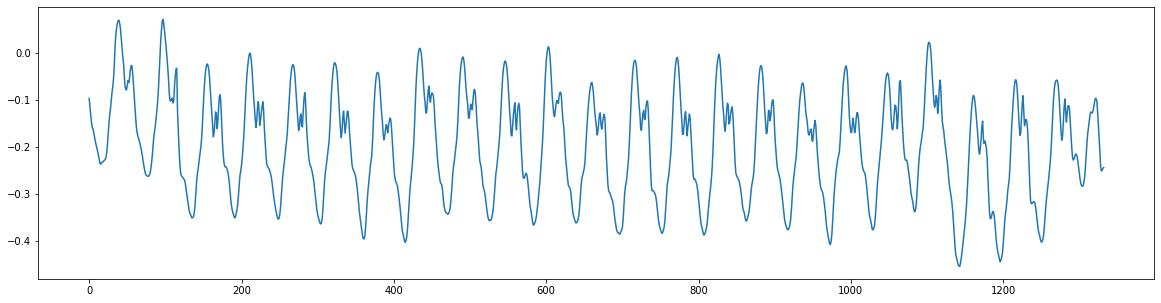

In [3]:
plt.figure(figsize=(20, 5))
plt.plot(x)
plt.show()

<hr>

In [4]:
ens = Ensemble([lam.AR(3),
                lam.ARMA(2, 1),
                lam.FFT(4)])

names = ['AR', 'ARMA', 'FFT']

In [8]:
ens.fit(np.vstack([x, y, z]))

C:\Users\qwert\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


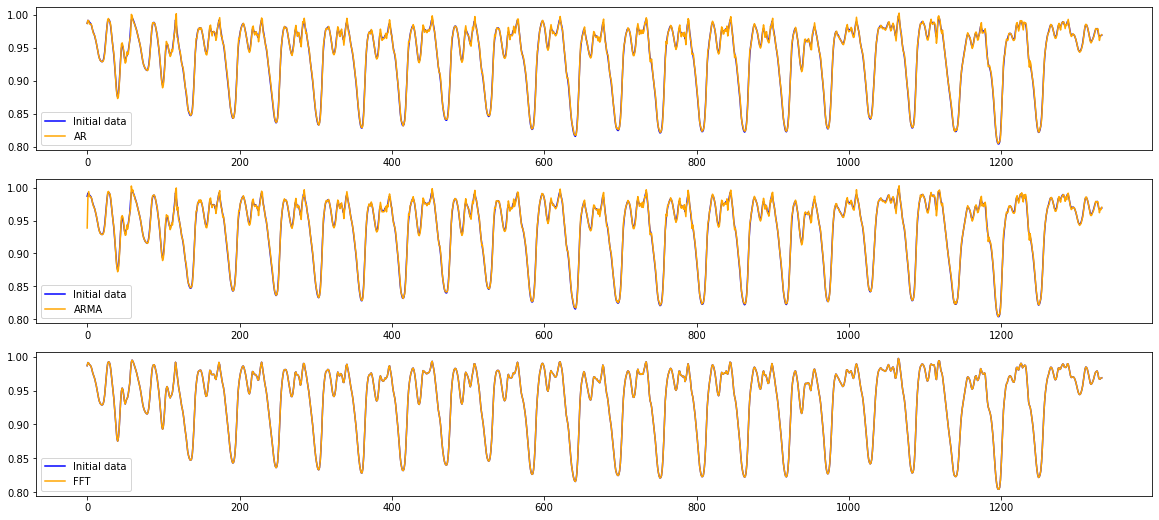

In [9]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 9))
for i in range(3):
    ax[i].plot(y, c='b', label='Initial data')
    ax[i].plot(ens.models[i]._preds[1], c='orange', label=names[i])
    ax[i].legend(loc='best')
plt.show()

In [10]:
print(ens.params.shape)
print(ens.params[0])
print(ens.models_indices)

(3, 12)
[-3.41281115e-03  2.10052595e+00 -1.45076553e+00  3.33194938e-01
 -1.98584295e-01  1.69181025e+00 -7.19112219e-01  5.14211233e-01
 -2.22699325e+01 -2.22699325e+01  7.99865620e+01  7.99865620e+01]
['0', '0', '0', '0', '1', '1', '1', '1', '2', '2', '2', '2']
